In [43]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [44]:
df = pd.read_csv('data3.csv') 

In [16]:
df.head()

,ID,Oxy,Pulse,Temp,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative
3,3,97,56,96,Negative
4,4,88,94,98,Positive


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10000 non-null  int64 
 1   Oxy     10000 non-null  int64 
 2   Pulse   10000 non-null  int64 
 3   Temp    10000 non-null  int64 
 4   Result  10000 non-null  object
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


,ID,Oxy,Pulse,Temp
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,92.548900,84.976600,100.000700
std,2886.89568,4.611197,26.305841,3.185045
min,0.00000,85.000000,40.000000,95.000000
25%,2499.75000,88.000000,63.000000,97.000000
50%,4999.50000,93.000000,85.000000,100.000000
75%,7499.25000,97.000000,108.000000,103.000000
max,9999.00000,100.000000,130.000000,105.000000


<AxesSubplot:>

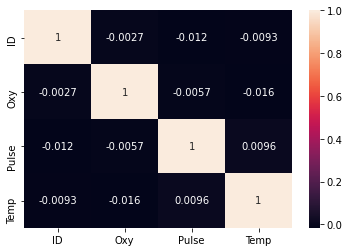

In [6]:
sns.heatmap(df.corr(),annot=True)

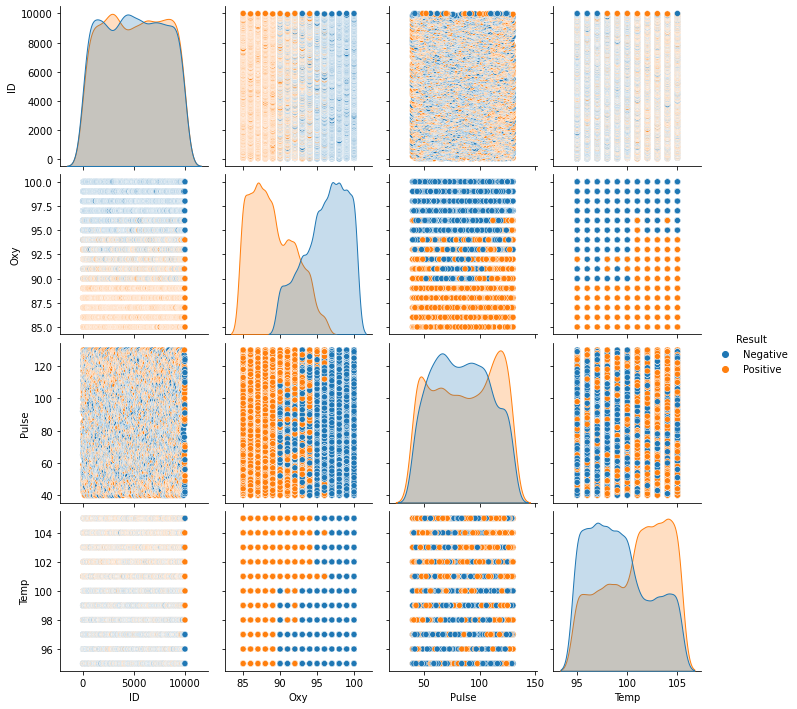

In [8]:
sns.pairplot(df,hue='Result')

In [45]:
# Splitting the dataset into the Training set and Test set  
X = df.iloc[:, [1,2,3]].values  
y = df['Result']

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)  

In [47]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train,y_train)
y_pred=lo.predict(X_test)

In [48]:
from sklearn.metrics import f1_score
print('f1_score : ',f1_score(y_test,y_pred,average='micro'))

f1_score :  0.9195


In [49]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion matrix:\n",cm) 
report = classification_report(y_test, y_pred) 
print("Classification report:\n",report)

Confusion matrix:
 [[917  74]
 [ 87 922]]
Classification report:
               precision    recall  f1-score   support

    Negative       0.91      0.93      0.92       991
    Positive       0.93      0.91      0.92      1009

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



# WITH PCA

In [37]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [38]:
scaler = StandardScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [39]:
pca = PCA(n_components=0.95) 
x_pca = pca.fit_transform(X_scaled_drop)
x_pca=pd.DataFrame(x_pca) 
print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape) 

Before PCA, X dataframe shape =  (10000, 3) 
After PCA, x_pca dataframe shape =  (10000, 2)


In [40]:
print(x_pca.shape)
print(y.shape)

(10000, 2)
(10000,)


In [41]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 4)  

In [35]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train,y_train)
y_pred=lo.predict(X_test)

In [42]:
from sklearn.metrics import f1_score
print('f1_score : ',f1_score(y_test,y_pred,average='micro'))

f1_score :  0.915
